# Python Demo showing audio handling

---

In this demo we want to show some audio handling with Python in Notebooks.

(All audio tacks are license free, so you can copy this demo without any limitations!)

## 1. Using audio widgets in markdown

Use this ```<audio controls src="data/file_example_MP3_2MG.mp3" type="audio/mpeg">Your browser does not support the audio tag.</audio>``` for creating a HTML5-audio widget.

<audio controls src="data/file_example_MP3_2MG.mp3" type="audio/mpeg">Your browser does not support the audio tag.</audio>

----

## 2. Using audio widgets in Python (notebooks)

In [7]:
from IPython.display import Audio           # load the Audio widget

Audio(filename='data/file_example_MP3_2MG.mp3')  # play music from a file

---

## 3. Loading audio data from MP3 file

In [10]:
import loadaudio      # this is for the handling of mp3 files
import numpy as np

song = loadaudio.audiofile('data/file_example_MP3_2MG.mp3')
data = song.read()     # data has now the music data

print(data.shape)
print(data[:100,0])    # print the first 100 elements

(2327806, 2)
[ 14.  22.  16.  20.  17.  16.  17.  13.  11.   5.   4.   0.  -8. -11.
 -21. -23. -28. -38. -35. -44. -44. -45. -45. -41. -43. -35. -35. -30.
 -25. -20. -12. -10.  -2.   1.   8.  10.  16.  19.  21.  27.  25.  32.
  32.  34.  36.  34.  38.  40.  41.  43.  47.  48.  53.  55.  59.  61.
  60.  62.  63.  60.  57.  60.  54.  54.  50.  48.  49.  39.  44.  37.
  34.  34.  25.  28.  17.  14.  12.  -1.  -4. -12. -22. -27. -34. -42.
 -50. -57. -65. -70. -74. -80. -84. -88. -90. -89. -91. -87. -86. -82.
 -73. -72.]


---

## 4. Show the audio data as a graphic

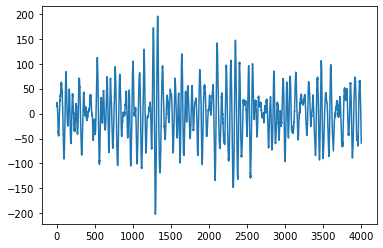

In [24]:
%matplotlib inline 

import loadaudio      # this is for the handling of mp3 files
import numpy as np
import matplotlib.pyplot as plt

song = loadaudio.audiofile('data/file_example_MP3_2MG.mp3')
data = song.read()     # data has now the music data

fig, ax = plt.subplots()
ax.plot(data[:4000,0]); # show a few ms of the left channel

---

## 5. Theory of the DFT (discrete fourier transformation)

The discrete fourier transformation (DTF) is working on a sequence of $N$ numbers $x=(x_{0},...,x_{N-1})$ which defines the signal and can be measurements from an experiment. One assumes, that the numbers standing for a period of a periodical signal. The DTF is also defined on a series of complex numbers.

The result of the transformation is a decomposition of the series in sinusoidal parts $X =(X_0,...,X_{N-1})$, whereas the constant $X_0$ describes the  mean average of the signal. 

The coefficients can be calculated with:

$$ X_k = \sum_{j=0}^{N-1} \textrm{e}^{-2\pi \textrm{i} \cdot \frac{jk}{N}}\cdot x_{j}$$

or in the polar notation  ${\mathrm {e} ^{\mathrm {i} \,\phi }=\cos \left(\phi \right)+\mathrm {i} \,\sin \left(\phi \right)}$:

$$ X_k = \sum_{j=0}^{N-1} x_j \left[\cos \left({\frac {2\pi }{N}}kn\right)-i\cdot \sin \left({\frac {2\pi }{N}}kn\right)\right] $$

The first coefficient $X_0$ is always the sum of the values of the input numbers:

$$X_0 = \sum_{j=0}^{N-1} x_j $$.

The inverse discrete fourier transformation (IDTF) is defined as:

$$ x_k = \frac{1}{N} \sum _{j=0}^{N-1}e^{2\pi \mathrm {i} \cdot {\frac {jk}{N}}}\cdot X_j $$

In the case that $N$ is even, the coefficients $X_1,...,X_{N/2-1}$ contain the positive-frequency terms, and the coefficients $X_{N/2},...,X_{N-1}$  contain the negative-frequency terms, in order of decreasingly negative frequency. If $N$ is odd, the coefficients $X_1,...,X_{(N-1)/2}$  contain the positive-frequency terms, and the elements $X_{(N-1)/2},...,X_{N-1}$  contain the negative-frequency terms, in order of decreasingly negative frequency.

If the sequence $x$ has only real values, the values of $X_i$ for positive frequencies is the conjugate of the values $X_i$ for negative frequencies (because the spectrum is symmetric). Typically, only the fourier coefficients corresponding to positive frequencies are plotted.

The fourier coefficients can be used for different purposes. For any periodic signals which are combinations of sinusoidal functions you can calculate the frequencies and amplitudes of these individual functions. Also you can use the coefficients to filter signals from a broader signal, reduce noisy signals etc. 

For the fourier coefficients which are calculated are complex numbers, even if the sequence $x$ has only real values. In Python a complex number can be written like that:

In [ ]:
x = 1.0          # a real value
c = 1.0 + 1.0j   # a complex number

print(c)
print(c.real)    # print the real part of the number
print(c.imag)    # print the imaginary part of the number
print(np.abs(c)) # print the power of c which is np.sqrt(c.real**2+c.imag**2)

---

## 6. Showing the audio spectrum

After the theory how to calculate the DTF coefficients, we can use a fast implementation of this calculation from the ```numpy``` library: ```np.fft.rfft`:

max. amplitude of 662.1421835785221 at 102.77587326789839 Hz


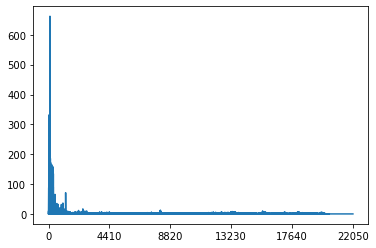

In [26]:
%matplotlib inline

import loadaudio      # this is for the handling of mp3 files
import numpy as np

import matplotlib.pyplot as plt

song = loadaudio.audiofile('data/file_example_MP3_2MG.mp3')

data = song.read()     # data has now the music data

music_data = (data[:,0]+data[:,1])/2.    # mean of the two tracks


fft_data = np.fft.rfft(music_data)
spectrum = np.abs(fft_data) / data.shape[0]

# some checks
max_ampl = spectrum.max()
max_freq = spectrum.argmax() * 22050 / spectrum.shape[0]
print(f'max. amplitude of {max_ampl} at {max_freq} Hz')


x = np.arange(spectrum.shape[0])

# plot ticks every 4410 Hz
xticks_labels = [0, 4410, 8820, 13230, 17640, 22050]
xticks = [spectrum.shape[0]*i/22050 for i in xticks_labels]
plt.xticks(xticks, xticks_labels)

plt.plot(x, spectrum)
plt.show();

---

## 7. Audio pass filter

As a nice example how to modify audio data, you can define some pass filters. 

 * low pass filter , all frequencies $f$ will pass until a certain frequency $f_l$
 * high pass filter, all frequencies $f$ will pass which are larger the a certain frequency $f_h$
 * band pass filter, all frequencies $f$ between the frequencies $f_l \le f \le f_h$ will pass

In [33]:
def low_pass(data, low_pass_cut_off):
    lpco = int(low_pass_cut_off / 22050 * data.shape[0])
    
    new_data = data.copy()   # copy the data
    new_data[lpco:] = 0.
    
    return new_data


def high_pass(data, high_pass_cut_off):
    hpco = int(high_pass_cut_off / 22050 * data.shape[0])
    
    new_data = data.copy()   # copy the data
    new_data[:hpco] = 0.
    
    return new_data
    
    
def band_pass(data, band_low_cut_off, band_high_cut_off):
    new_data = low_pass(data, band_high_cut_off)
    return high_pass(new_data, band_low_cut_off )

In [37]:
import loadaudio      # this is for the handling of mp3 files
import numpy as np
from IPython.display import Audio

song = loadaudio.audiofile('data/file_example_MP3_2MG.mp3')
data = song.read()     # data has now the music data

music_data = (data[:,0]+data[:,1])/2.    # mean of the two tracks

fft_data = np.fft.rfft(music_data)       # calculate the spectrum

# filter the data
new_data = low_pass(fft_data, 200)       # low pass test
#new_data = high_pass(fft_data, 4400)     # high pass test
#new_data = band_pass(fft_data, 440, 4400) # band pass test

# resample the data
new_music_data = np.fft.irfft(new_data)
Audio(new_music_data,rate=44100)

---

## 8. Playing around

Please play a little bit with this notebook. It is by far not complete, but I like it, because here you can __hear__ your changes, if you modify values!